Data Product Question-and-Answer AI chatbot that will help to have a general understanding of machine learning.
Using natural language processing (NLP) and machine learning (ML) techniques.

In [21]:
import pandas as pd
# Load data from CSV file
data = pd.read_csv("/Users/emanuelmhlanga/Documents/DSC580/AI.csv")
# Display the first 5 rows of data
print(data.head())

                                            Question  \
0  Who did the first work generally recognized as...   
1  What sources was drawn on the formation of the...   
2             Who created the Hebbian learning rule?   
3            When the first neural network is built?   
4           What is the first neural network called?   

                                              Answer  
0        Warren McCulloch and Walter Pitts (1943).\n  
1  knowledge of the basic physiology and function...  
2                              Donald Hebb (1949).\n  
3                                            1950.\n  
4                                       The SNARC.\n  


Using the pandas library to load the question-and-answer dataset from a CSV file. Then we print the first 5 rows of data to make sure that the data has been loaded correctly.

Data Exploration

Usin various pandas functions to explore the dataset. We check the shape of the dataset (i.e., number of rows and columns), the data types of each column, the number of missing values in each column, and the unique values in the 'answer' column.


In [22]:
# Check the shape of the dataset
print(data.shape)

# Check the data types of each column
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Check the unique values of the 'answer' column
print(data['Answer'].unique())

(503, 2)
Question    object
Answer      object
dtype: object
Question    0
Answer      0
dtype: int64
['Warren McCulloch and Walter Pitts (1943).\n'
 "knowledge of the basic physiology and function of neurons in the brain; a formal analysis of propositional logic due to Russell and Whitehead; and Turing's theory of computation.\n"
 'Donald Hebb (1949).\n' '1950.\n' 'The SNARC.\n' ' machine learning'
 'He prefer to develop learning algorithms and then teach the machine rather than by programming its intelligence by hand.\n'
 'Allen Newell and Herbert Simon from Carnegie Tech.\n'
 'GPS was designed from the start to imitate human problem-solving protocols.\n'
 'General Problem Solver (GPS).\n' 'Allen Newell and Herbert Simon.\n'
 'a physical symbol system has the necessary and sufficient means for general intelligent action.\n'
 'Herbert Gelernter (1959).\n' ' on checkers' 'John McCarthy.\n'
 ' in 1958' "J. A. Robinson's\n" "James Slagle's Saint program\n"
 'The blocks world.\n'
 '"The t

Data Cleaning and Preprocessing

Defining a function to clean the text data. The function converts the text to lowercase, removes punctuation and numbers, and removes extra spaces. Then we apply the cleaning function to the 'question' and 'answer' columns using the apply() function in pandas.


In [23]:
import re
import string

# Define a function to clean the text data
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove numbers
    text = re.sub('\d+', '', text)
    # Remove extra spaces
    text = re.sub(' +', ' ', text)
    return text

# Apply the cleaning function to the 'question' column
data['Question'] = data['Question'].apply(clean_text)

# Apply the cleaning function to the 'answer' column
data['Answer'] = data['Answer'].apply(clean_text)

Analytical Tools
Using the scikit-learn library to create a TF-IDF (term frequency-inverse document frequency) matrix and a cosine similarity matrix. The TF-IDF matrix represents the frequency of each word in each question, normalized by the frequency of the word in the entire dataset. The cosine similarity matrix measures the similarity between each pair of questions based on the cosine of the angle between their TF-IDF vectors.


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Create a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(data['Question'])

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

Visual Tools
In this step, we use the matplotlib library to plot a histogram of the lengths of the answers in the dataset. The histogram shows the distribution of answer lengths, which can help us understand the characteristics of the data.


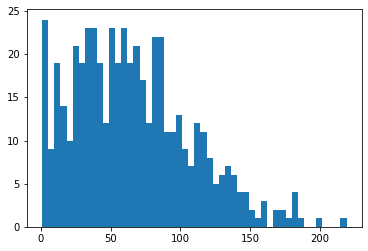

In [25]:
import matplotlib.pyplot as plt

# Plot a histogram of the answer lengths
data['answer_length'] = data['Answer'].apply(len)
plt.hist(data['answer_length'], bins=50)
plt.show()

Generating Reports
In this step, we use the seaborn library to generate a heatmap of the cosine similarity matrix. The heatmap visualizes the similarity between each pair of questions as a color gradient. This can help us identify clusters of similar questions in the dataset.



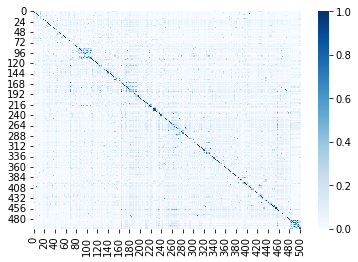

In [26]:
import seaborn as sns

# Generate a heatmap of the cosine similarity matrix
sns.heatmap(cosine_sim, cmap='Blues')
plt.show()

In [27]:

plt.savefig('pairplot.png') # save the pairplot as a PNG file

<Figure size 432x288 with 0 Axes>

Executing the Pipeline Step by Step
In this step, we define a function to get the most similar answer for a given question. The function first cleans the question text, transforms it into a TF-IDF vector, calculates the cosine similarity between the question and all the questions in the dataset, and returns the answer corresponding to the most similar question. We test the function with a sample question to make sure that it works correctly.


In [28]:
# Define a function to get the most similar answer for a given question
def get_answer(question):
    # Clean the question text
    question = clean_text(question)
    # Transform the question into a TF-IDF vector
    question_vec = vectorizer.transform([question])
    # Calculate the cosine similarity between the question and all the questions in the dataset
    sim_scores = cosine_similarity(question_vec, tfidf_matrix)
    # Get the index of the most similar question
    idx = sim_scores.argmax()
    # Return the corresponding answer
    return data.iloc[idx]['Answer']

# Test the function with a sample question
question = "Who presented the Logic Theorist (LT)?"
answer = get_answer(question)
print(answer)

allen newell and herbert simon from carnegie tech



In [29]:
def display_help():
    print("I'm a chatbot that can answer your machine learning questions based on the data I have been trained on. Here are some things you can ask me:\n")
    print("1. Ask me a machine learning question and I'll try my best to answer it.")
    print("2. Type 'help' or 'h' to see this message again.")
    print("3. Type 'exit' or 'e' to quit.")

Chat Platform
In this step, we define a function to run the chatbot. The function first prints a welcome message, then enters a loop where it gets a question from the user, calls the get_answer() function to get the answer, and prints the answer. The loop continues until the user exits the chatbot.

In [ ]:
# Define a function to run the chatbot
def run_chatbot():
    # Print a welcome message
    print("Hi, I'm a chatbot. How can I help you?")
    conversation = [] # initialize an empty list to store the conversation
    while True:
        # Get a question from the user
        question = input("> ")

        # Check if the user wants help
        if question.lower() in ['help', 'h']:
            display_help()
            conversation.append((question, "Help"))
            continue

        # Check if the user wants to exit
        if question.lower() in ['exit', 'e']:
            print("Goodbye!")
            conversation.append((question, "Goodbye"))
            break

        # Get the answer from the chatbot
        answer = get_answer(question)

        # Check if the answer is None
        if answer is None:
            print("Sorry, I don't understand. Do you need help? Type 'help' or 'h' for more information. Type 'exit' or 'e' to quit.")
            conversation.append((question, "Unknown"))
            continue

        # Print the answer
        print(answer)
        conversation.append((question, answer)) # store the question-answer pair in the conversation list
    
    # save the conversation to a file
    with open("chatbot_conversation.txt", "w") as file:
        for q, a in conversation:
            file.write(f"{q}\t{a}\n")
        
# Run the chatbot
run_chatbot()

Hi, I'm a chatbot. How can I help you?
